In [2]:
# Import required libraries and dependencies
import pandas as pd
#import hvplot.pandas

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [6]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

AttributeError: ignored

In [7]:
df_market_data.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

---

### Prepare the Data

In [8]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
df_market_scaled = StandardScaler().fit_transform(df_market_data[["price_change_percentage_24h" , "price_change_percentage_7d","price_change_percentage_14d","price_change_percentage_30d",
       "price_change_percentage_60d", "price_change_percentage_200d",
       "price_change_percentage_1y"]])

In [9]:
df_market_scaled[0:3]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051]])

In [10]:
df_market_scaled = pd.DataFrame(
    df_market_scaled,
    columns=["price_change_percentage_24h" , "price_change_percentage_7d","price_change_percentage_14d","price_change_percentage_30d",
       "price_change_percentage_60d", "price_change_percentage_200d",
       "price_change_percentage_1y"])

In [11]:
# Create a DataFrame with the scaled data
df_market_scaled


df_market_scaled["Ticker"] = df_market_data.index


df_market_scaled = df_market_scaled.set_index("Ticker")



# Display sample data
df_market_scaled

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
Ticker,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Data.

In [12]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))
# Create a a list to store inertia values
inertia = []




In [13]:
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(df_market_scaled)
    inertia.append(k_model.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [14]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame using the elbow_data Dictionary
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

# Create a DataFrame with the data to plot the Elbow curve


,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.405923


<Axes: xlabel='k'>

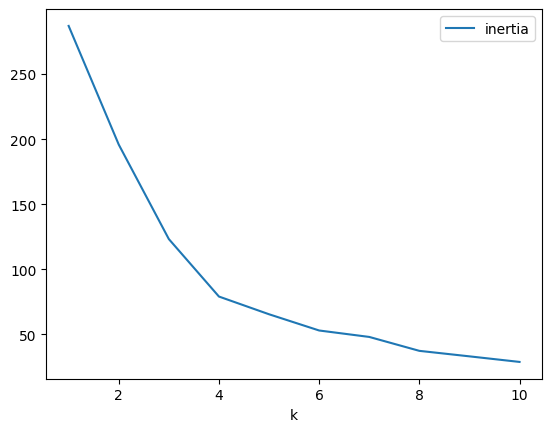

In [15]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
# Plot the DataFrame
df_elbow.plot("k", "inertia")


#### Answer the following question:

**Question:** What is the best value for `k`?

**Answer:*4*

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [16]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [17]:
# Fit the K-Means model using the scaled data
model.fit(df_market_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [18]:
# Predict the clusters to group the cryptocurrencies using the scaled data

df_market_pred = model.predict(df_market_scaled)
# Print the resulting array of cluster values.
print(df_market_pred)

[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [ ]:
# Create a copy of the DataFrame


In [19]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data['segment'] = df_market_pred


# Display sample data
df_market_data.sample(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,segment
coin_id,,,,,,,,
wrapped-bitcoin,1.10231,7.40537,6.55668,7.37557,-3.58772,83.90520,37.53424,0
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186,0
ethereum-classic,-0.45950,3.05209,-1.26669,2.89572,-25.90799,10.39203,11.11094,3
huobi-token,-0.40818,1.61798,0.45488,-3.25488,-3.40689,42.23704,24.57164,3
ontology,-1.35845,-1.21399,-10.56222,-34.70548,-32.70004,54.76717,-12.65493,3
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756,0
ethlend,-13.52786,4.21266,-9.80075,-29.99499,2.13917,2227.92782,7852.08970,1
true-usd,-0.06197,0.16642,0.10974,0.03090,0.25154,-0.08874,0.40617,3
vechain,1.28766,-1.76352,-18.15890,-14.16831,-43.62359,269.70264,202.86827,3


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

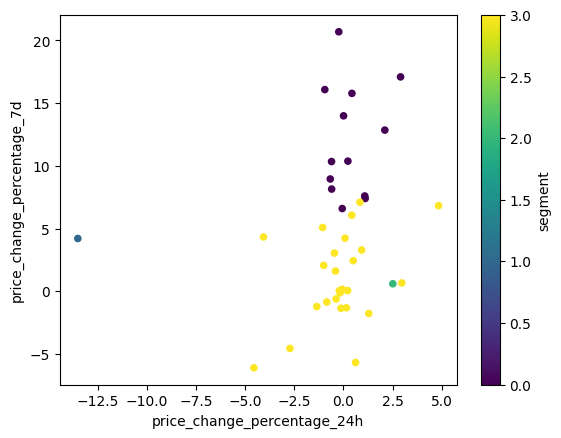

In [20]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
df_market_data.plot.scatter("price_change_percentage_24h", "price_change_percentage_7d", c='segment', colormap='viridis')

---

### Optimize Clusters with Principal Component Analysis.

In [21]:
# Create a PCA model instance and set `n_components=3`.
pca=PCA(n_components=3)

In [22]:
# Use the PCA model with `fit_transform` to reduce to
# three principal components.
market_pca = pca.fit_transform(df_market_data)

# View the first five rows of the DataFrame.
market_pca[:5]

array([[-341.80076297,  -51.36736823,   12.52616664],
       [-249.42026714,   24.11695471,  -14.23076936],
       [-402.61482131, -118.71044146,   24.83804222],
       [-406.7525377 ,  -79.48699269,    1.56600748],
       [-382.42974792, -103.43255248,   16.75383434]])

In [23]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([9.76036221e-01, 2.30282709e-02, 7.48307451e-04])

#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:**

In [29]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data
df_market_pca = pd.DataFrame(market_pca, columns=["PC1", "PC2","PC3"])

# Copy the crypto names from the original data
df_market_pca["Ticker"] = df_market_data.index

# Set the Ticker column as index
df_market_pca = df_market_pca.set_index("Ticker")

# Set the coinid colnmn as index


# Display sample dat(a
df_market_pca.head()

,PC1,PC2,PC3
Ticker,,,
bitcoin,-341.800763,-51.367368,12.526167
ethereum,-249.420267,24.116955,-14.230769
tether,-402.614821,-118.710441,24.838042
ripple,-406.752538,-79.486993,1.566007
bitcoin-cash,-382.429748,-103.432552,16.753834


---

### Find the Best Value for k Using the PCA Data

In [30]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))
# Create a a list to store inertia values
inertia = []

In [31]:
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(df_market_pca)
    inertia.append(k_model.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [32]:
# Create a dictionary with the data to plot the Elbow curve

# Create a DataFrame with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame using the elbow_data Dictionary
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()


,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.405923


<Axes: xlabel='k'>

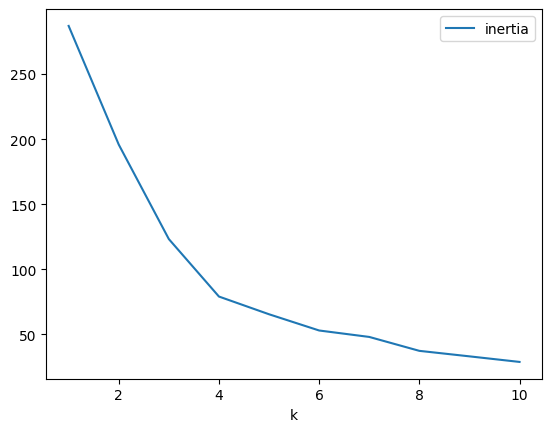

In [33]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow.plot("k", "inertia")

#### Answer the following questions:

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [ ]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [ ]:
# Fit the K-Means model using the PCA data
model.fit(df_market_pca)

In [ ]:
# Predict the clusters to group the cryptocurrencies using the PCA data
df_market_pred_pca = model.predict(df_market_pca)
# Print the resulting array of cluster values.
print(df_market_pred_pca)
# Print the resulting array of cluster values.


In [ ]:
# Create a copy of the DataFrame with the PCA data

df_market_pca['segment'] = df_market_pred_pca


# Display sample data
df_market_pca.sample(10)
# Add a new column to the DataFrame with the predicted clusters


# Display sample data


In [ ]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
df_market_pca.plot.scatter("PC1", "PC2", c='segment', colormap='viridis')

<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

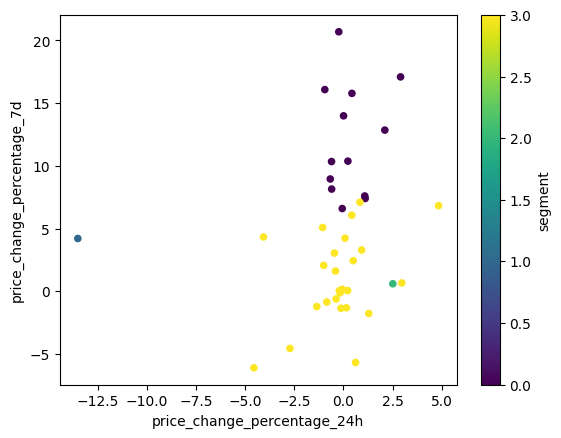

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [ ]:
# Composite plot to contrast the Elbow curves

In [ ]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

#### Answer the following question:

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**